# Train a Simple TensorFlow Lite for Microcontrollers model

This notebook will train a model

# Imports & Environment Setup

In [1]:
# Define paths to model files
import os
MODELS_DIR = 'models/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + 'model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Set seed for experiment reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
tf.__version__

'2.3.1'

# Data Preparation

In [4]:
#let's download the dataset from UCI
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

#columns don't come named, so these are the names for use
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

#turn it into a Pandas Dataset
dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [5]:
#drop nulls
dataset = dataset.dropna()

#train / test split
train_dataset = dataset.sample(frac=0.8, random_state=seed)
test_dataset = dataset.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

#MPG is our target
train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

#select only the Horsepower column
train_features = np.array(train_features['Horsepower'])
test_features = np.array(test_features['Horsepower'])

# Model Training

In [6]:
model = tf.keras.Sequential()

#only takes one feature
model.add(keras.layers.Dense(16, activation='relu', input_shape=(1,)))
model.add(keras.layers.Dense(16, activation='relu'))
#only one output
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss="mse", metrics=["mae"])

In [7]:
# Train the model
history = model.fit(train_features, train_labels, epochs=400, batch_size=64,
                    validation_data=(test_features, test_labels))

# Save the model to disk
model.save(MODEL_TF)

Epoch 1/400
5/5 [==============================] - 0s 28ms/step - loss: 324.4500 - mae: 15.1116 - val_loss: 325.2764 - val_mae: 15.5863
Epoch 2/400
5/5 [==============================] - 0s 4ms/step - loss: 266.9764 - mae: 13.5713 - val_loss: 268.2677 - val_mae: 14.1326
Epoch 3/400
5/5 [==============================] - 0s 4ms/step - loss: 232.8098 - mae: 12.7620 - val_loss: 231.7022 - val_mae: 13.1625
Epoch 4/400
5/5 [==============================] - 0s 5ms/step - loss: 218.3025 - mae: 12.3949 - val_loss: 211.1625 - val_mae: 12.4804
Epoch 5/400
5/5 [==============================] - 0s 4ms/step - loss: 215.7895 - mae: 12.2089 - val_loss: 202.4168 - val_mae: 12.1091
Epoch 6/400
5/5 [==============================] - 0s 5ms/step - loss: 218.0125 - mae: 12.1844 - val_loss: 200.3546 - val_mae: 11.9960
Epoch 7/400
5/5 [==============================] - 0s 5ms/step - loss: 217.7813 - mae: 12.1694 - val_loss: 201.0379 - val_mae: 12.0378
Epoch 8/400
5/5 [==============================] - 0s 

5/5 [==============================] - 0s 4ms/step - loss: 207.1165 - mae: 11.9794 - val_loss: 202.1973 - val_mae: 12.1905
Epoch 62/400
5/5 [==============================] - 0s 5ms/step - loss: 206.9552 - mae: 11.9707 - val_loss: 201.9549 - val_mae: 12.1822
Epoch 63/400
5/5 [==============================] - 0s 5ms/step - loss: 206.7976 - mae: 11.9686 - val_loss: 201.8100 - val_mae: 12.1777
Epoch 64/400
5/5 [==============================] - 0s 5ms/step - loss: 206.7015 - mae: 11.9673 - val_loss: 202.8931 - val_mae: 12.2198
Epoch 65/400
5/5 [==============================] - 0s 5ms/step - loss: 206.5419 - mae: 11.9689 - val_loss: 201.5545 - val_mae: 12.1700
Epoch 66/400
5/5 [==============================] - 0s 5ms/step - loss: 206.3261 - mae: 11.9552 - val_loss: 202.0585 - val_mae: 12.1904
Epoch 67/400
5/5 [==============================] - 0s 5ms/step - loss: 206.1545 - mae: 11.9557 - val_loss: 202.0321 - val_mae: 12.1904
Epoch 68/400
5/5 [==============================] - 0s 4ms/st

5/5 [==============================] - 0s 4ms/step - loss: 195.0527 - mae: 11.5960 - val_loss: 189.4700 - val_mae: 11.7695
Epoch 122/400
5/5 [==============================] - 0s 4ms/step - loss: 194.9216 - mae: 11.5729 - val_loss: 189.0149 - val_mae: 11.7524
Epoch 123/400
5/5 [==============================] - 0s 4ms/step - loss: 194.5813 - mae: 11.5685 - val_loss: 190.9201 - val_mae: 11.8325
Epoch 124/400
5/5 [==============================] - 0s 4ms/step - loss: 194.2914 - mae: 11.5676 - val_loss: 189.7863 - val_mae: 11.7891
Epoch 125/400
5/5 [==============================] - 0s 5ms/step - loss: 193.9257 - mae: 11.5533 - val_loss: 189.4936 - val_mae: 11.7792
Epoch 126/400
5/5 [==============================] - 0s 4ms/step - loss: 193.5899 - mae: 11.5479 - val_loss: 190.3480 - val_mae: 11.8151
Epoch 127/400
5/5 [==============================] - 0s 5ms/step - loss: 193.6428 - mae: 11.5606 - val_loss: 192.0593 - val_mae: 11.8806
Epoch 128/400
5/5 [==============================] - 0s

Epoch 181/400
5/5 [==============================] - 0s 4ms/step - loss: 172.5639 - mae: 10.8446 - val_loss: 171.2102 - val_mae: 11.1748
Epoch 182/400
5/5 [==============================] - 0s 4ms/step - loss: 172.6182 - mae: 10.8339 - val_loss: 167.9267 - val_mae: 11.0465
Epoch 183/400
5/5 [==============================] - 0s 4ms/step - loss: 171.5406 - mae: 10.8011 - val_loss: 168.6809 - val_mae: 11.0802
Epoch 184/400
5/5 [==============================] - 0s 4ms/step - loss: 171.3444 - mae: 10.8098 - val_loss: 171.8030 - val_mae: 11.2037
Epoch 185/400
5/5 [==============================] - 0s 4ms/step - loss: 170.7212 - mae: 10.7947 - val_loss: 167.0784 - val_mae: 11.0217
Epoch 186/400
5/5 [==============================] - 0s 4ms/step - loss: 169.9355 - mae: 10.7455 - val_loss: 167.0669 - val_mae: 11.0241
Epoch 187/400
5/5 [==============================] - 0s 4ms/step - loss: 169.8017 - mae: 10.7329 - val_loss: 165.7975 - val_mae: 10.9758
Epoch 188/400
5/5 [======================

5/5 [==============================] - 0s 4ms/step - loss: 118.9859 - mae: 8.8763 - val_loss: 114.0272 - val_mae: 9.0031
Epoch 242/400
5/5 [==============================] - 0s 4ms/step - loss: 118.6128 - mae: 8.8907 - val_loss: 118.6699 - val_mae: 9.2092
Epoch 243/400
5/5 [==============================] - 0s 4ms/step - loss: 116.5747 - mae: 8.7433 - val_loss: 119.3179 - val_mae: 9.2257
Epoch 244/400
5/5 [==============================] - 0s 4ms/step - loss: 114.9057 - mae: 8.7133 - val_loss: 113.1903 - val_mae: 8.9826
Epoch 245/400
5/5 [==============================] - 0s 4ms/step - loss: 114.3914 - mae: 8.6823 - val_loss: 113.7871 - val_mae: 9.0107
Epoch 246/400
5/5 [==============================] - 0s 5ms/step - loss: 112.7838 - mae: 8.6346 - val_loss: 112.3935 - val_mae: 8.9523
Epoch 247/400
5/5 [==============================] - 0s 4ms/step - loss: 111.3918 - mae: 8.5696 - val_loss: 111.5286 - val_mae: 8.9159
Epoch 248/400
5/5 [==============================] - 0s 5ms/step - lo

5/5 [==============================] - 0s 4ms/step - loss: 49.9610 - mae: 5.6771 - val_loss: 53.9312 - val_mae: 5.9812
Epoch 303/400
5/5 [==============================] - 0s 9ms/step - loss: 48.6628 - mae: 5.4683 - val_loss: 50.3305 - val_mae: 5.8654
Epoch 304/400
5/5 [==============================] - 0s 5ms/step - loss: 47.3869 - mae: 5.4249 - val_loss: 49.7112 - val_mae: 5.8210
Epoch 305/400
5/5 [==============================] - 0s 5ms/step - loss: 46.6046 - mae: 5.3797 - val_loss: 48.9369 - val_mae: 5.7712
Epoch 306/400
5/5 [==============================] - 0s 4ms/step - loss: 45.8464 - mae: 5.3297 - val_loss: 48.0341 - val_mae: 5.7171
Epoch 307/400
5/5 [==============================] - 0s 4ms/step - loss: 45.3475 - mae: 5.3544 - val_loss: 48.5483 - val_mae: 5.7038
Epoch 308/400
5/5 [==============================] - 0s 4ms/step - loss: 44.5515 - mae: 5.1926 - val_loss: 46.4828 - val_mae: 5.6184
Epoch 309/400
5/5 [==============================] - 0s 5ms/step - loss: 43.8615 - 

Epoch 364/400
5/5 [==============================] - 0s 4ms/step - loss: 26.3662 - mae: 4.0921 - val_loss: 27.0489 - val_mae: 4.1743
Epoch 365/400
5/5 [==============================] - 0s 4ms/step - loss: 26.0876 - mae: 3.9388 - val_loss: 26.2223 - val_mae: 4.2546
Epoch 366/400
5/5 [==============================] - 0s 4ms/step - loss: 25.5573 - mae: 3.9039 - val_loss: 26.7373 - val_mae: 4.1598
Epoch 367/400
5/5 [==============================] - 0s 4ms/step - loss: 25.8155 - mae: 3.9404 - val_loss: 26.1147 - val_mae: 4.2010
Epoch 368/400
5/5 [==============================] - 0s 4ms/step - loss: 25.2632 - mae: 3.8749 - val_loss: 26.4414 - val_mae: 4.1452
Epoch 369/400
5/5 [==============================] - 0s 4ms/step - loss: 25.4206 - mae: 3.9339 - val_loss: 25.8244 - val_mae: 4.2177
Epoch 370/400
5/5 [==============================] - 0s 4ms/step - loss: 25.0900 - mae: 3.8739 - val_loss: 26.1719 - val_mae: 4.1325
Epoch 371/400
5/5 [==============================] - 0s 4ms/step - lo

# Model Evaluation

In [8]:
#we take one input and provide one prediction
model.predict([50])

array([[31.561552]], dtype=float32)

Text(0, 0.5, 'Loss')

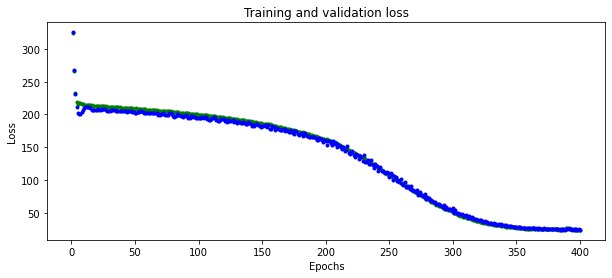

In [9]:
#plotting loss over our epochs
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 4))


plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

3/3 [==============================] - 0s 1ms/step - loss: 24.8099 - mae: 4.1896


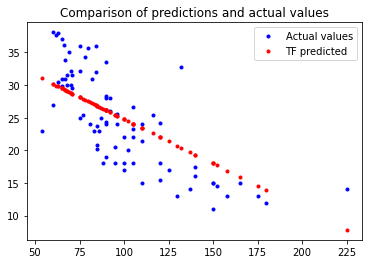

In [10]:
# Calculate and print the loss on our test dataset
test_loss, test_mae = model.evaluate(test_features, test_labels)

# Make predictions based on our test dataset
y_test_pred = model.predict(test_features)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(test_features, test_labels, 'b.', label='Actual values')
plt.plot(test_features, y_test_pred, 'r.', label='TF predicted')
plt.legend()
plt.show()

# Converting Models
A representative dataset is provided and two models saved, one in TFLite format without quantization and one in TFLite format with int8 quantization for activations and weights.

In [11]:
#preparing features for evaluating models
x_test = tf.convert_to_tensor(train_features,dtype=tf.float32)


def representative_dataset():
  for i in range(300):
    yield([tf.reshape(x_test[i],(1, 1))])

In [12]:
# Convert the model to TFLite without quantization
converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_TF)
model_no_quant_tflite = converter.convert()
open(MODEL_NO_QUANT_TFLITE, "wb").write(model_no_quant_tflite)


# Convert and save the model with quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Enforce integer only quantization
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
# Create and provide a representative dataset
converter.representative_dataset = representative_dataset
model_tflite = converter.convert()
open(MODEL_TFLITE, "wb").write(model_tflite)

2784

## 2. Compare Model Performance
Compare loss or performance on the test set to evaluate how much fidelity is lost with compression and quantization.

In [13]:
x_test = test_features.copy()
x_test = x_test.reshape((x_test.size, 1))
x_test = x_test.astype(np.float32)

In [14]:
#first, make predictions using the model we trained, no TFLite or quant
y_test_pred_tf = model.predict(x_test)

In [15]:
#next, TFLite with no quant

#initialize and allocate memory
no_q_interpreter = tf.lite.Interpreter(model_content=model_no_quant_tflite)
no_q_interpreter.allocate_tensors()

y_test_pred_no_quant_tflite = np.empty(x_test.size, dtype=np.float32)
for i in range(len(x_test)):
    no_q_interpreter.set_tensor(no_q_interpreter.get_input_details()[0]["index"], [x_test[i]])
    no_q_interpreter.invoke()
    y_test_pred_no_quant_tflite[i] = no_q_interpreter.get_tensor(no_q_interpreter.get_output_details()[0]["index"])[0]

### Prediction with Quantization
It's a bit more involved to get these predictions, we must use the scaling criteria in our interpreter

In [16]:
q_interpreter = tf.lite.Interpreter(model_content=model_tflite)
q_interpreter.allocate_tensors()

In [17]:
#interpreter gives us information we'll need to prepare input and output data
q_interpreter.get_input_details()

[{'name': 'dense_input',
  'index': 0,
  'shape': array([1, 1], dtype=int32),
  'shape_signature': array([-1,  1], dtype=int32),
  'dtype': numpy.int8,
  'quantization': (0.9019607901573181, -128),
  'quantization_parameters': {'scales': array([0.9019608], dtype=float32),
   'zero_points': array([-128], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [18]:
q_interpreter.get_output_details()

[{'name': 'Identity',
  'index': 9,
  'shape': array([1, 1], dtype=int32),
  'shape_signature': array([-1,  1], dtype=int32),
  'dtype': numpy.int8,
  'quantization': (0.12437082827091217, -128),
  'quantization_parameters': {'scales': array([0.12437083], dtype=float32),
   'zero_points': array([-128], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [19]:
input_details = q_interpreter.get_input_details()[0]
output_details = q_interpreter.get_output_details()[0]

input_scale, input_zero_point = input_details["quantization"]

x_test_ = x_test / input_scale + input_zero_point
x_test_ = x_test_.astype(input_details["dtype"])
  
# Invoke the interpreter
y_test_pred_tflite = np.empty(x_test_.size, dtype=output_details["dtype"])
for i in range(len(x_test_)):
    q_interpreter.set_tensor(input_details["index"], [x_test_[i]])
    q_interpreter.invoke()
    y_test_pred_tflite[i] = q_interpreter.get_tensor(output_details["index"])[0]

# If required, dequantized the output layer (from integer to float)
output_scale, output_zero_point = output_details["quantization"]
y_test_pred_tflite = y_test_pred_tflite.astype(np.float32)
y_test_pred_tflite = (y_test_pred_tflite - output_zero_point) * output_scale

**1. Predictions**

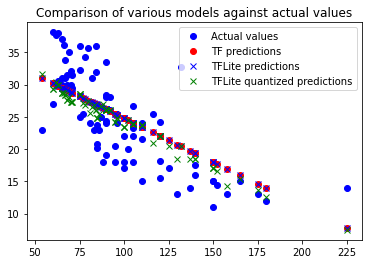

In [20]:
x_test = test_features
y_test = test_labels
# Compare predictions
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual values')
plt.plot(x_test, y_test_pred_tf, 'ro', label='TF predictions')
plt.plot(x_test, y_test_pred_no_quant_tflite, 'bx', label='TFLite predictions')
plt.plot(x_test, y_test_pred_tflite, 'gx', label='TFLite quantized predictions')
plt.legend()
plt.show()

**2. Loss (MSE/Mean Squared Error)**

In [21]:
model.loss

'mse'

In [22]:
loss_function = tf.keras.losses.get(model.loss)
#have to reshape this to be wide or a long list, rather than narrow or list of lists
loss_tf = loss_function(y_test, y_test_pred_tf.reshape(1,-1)[0]).numpy()
loss_no_quant_tflite = loss_function(y_test, np.float64(y_test_pred_no_quant_tflite)).numpy()
loss_tflite = loss_function(y_test, y_test_pred_tflite).numpy()

In [23]:
# Compare loss
df = pd.DataFrame.from_records(
    [["TensorFlow", loss_tf],
     ["TensorFlow Lite", loss_no_quant_tflite],
     ["TensorFlow Lite Quantized", loss_tflite]],
     columns = ["Model", "Loss/MSE"], index="Model").round(4)
df

,Loss/MSE
Model,
TensorFlow,24.8099
TensorFlow Lite,24.8099
TensorFlow Lite Quantized,23.8710


**3. Size**

In [24]:
# Calculate size
size_tf = os.path.getsize(MODEL_TF)
size_no_quant_tflite = os.path.getsize(MODEL_NO_QUANT_TFLITE)
size_tflite = os.path.getsize(MODEL_TFLITE)

In [25]:
# Compare size
pd.DataFrame.from_records(
    [["TensorFlow", f"{size_tf} bytes", ""],
     ["TensorFlow Lite", f"{size_no_quant_tflite} bytes ", f"(reduced by {size_tf - size_no_quant_tflite} bytes)"],
     ["TensorFlow Lite Quantized", f"{size_tflite} bytes", f"(reduced by {size_no_quant_tflite - size_tflite} bytes)"]],
     columns = ["Model", "Size", ""], index="Model")

,Size,
Model,,
TensorFlow,160 bytes,
TensorFlow Lite,3012 bytes,(reduced by -2852 bytes)
TensorFlow Lite Quantized,2784 bytes,(reduced by 228 bytes)


**Summary**

## Generate a TensorFlow Lite for Microcontrollers Model
Convert the TensorFlow Lite quantized model into a C source file that can be loaded by TensorFlow Lite for Microcontrollers.

In [26]:
# Convert to a C source file, i.e, a TensorFlow Lite for Microcontrollers model
!xxd -i {MODEL_TFLITE} > {MODEL_TFLITE_MICRO}

In [27]:
# Print the C source file
!cat {MODEL_TFLITE_MICRO}

unsigned char models_model_tflite[] = {
  0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x12, 0x00, 0x1c, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00,
  0x10, 0x00, 0x14, 0x00, 0x00, 0x00, 0x18, 0x00, 0x12, 0x00, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x98, 0x0a, 0x00, 0x00, 0x08, 0x03, 0x00, 0x00,
  0xf0, 0x02, 0x00, 0x00, 0x3c, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x0c, 0x00,
  0x04, 0x00, 0x08, 0x00, 0x08, 0x00, 0x00, 0x00, 0x08, 0x00, 0x00, 0x00,
  0x0b, 0x00, 0x00, 0x00, 0x13, 0x00, 0x00, 0x00, 0x6d, 0x69, 0x6e, 0x5f,
  0x72, 0x75, 0x6e, 0x74, 0x69, 0x6d, 0x65, 0x5f, 0x76, 0x65, 0x72, 0x73,
  0x69, 0x6f, 0x6e, 0x00, 0x0c, 0x00, 0x00, 0x00, 0xa8, 0x02, 0x00, 0x00,
  0x94, 0x02, 0x00, 0x00, 0x38, 0x02, 0x00, 0x00, 0xd4, 0x01, 0x00, 0x00,
  0xc0, 0x01, 0x00, 0x00, 0x9c, 0x01, 0x00, 0x00, 0x88, 0x00, 0x00, 0x00,
  0x64, 0x00, 0x00, 0x00, 0x58, 0x00, 0x00, 0x00, 0x44, 0x00, 0x00, 0x00